# Building a handwritten digits classifier

This project aims to build a machine learning model to classify hand-written digits. We will use the hand-written digits [dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI, which is pre-loaded with the library Scikit-learn.

## Data overview

In [1]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

In [2]:
# Load dataset
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
data = pd.DataFrame(digits['data'])
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
target = pd.Series(digits['target'])
target.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Each row of `data` contains the pixel values of an image. To visualize this images, we need to reshape them back to their original dimensions (8 x 8 pixels). We will use matplotlib to visualize some of the images in the dataset. In the scatter plot grid below, the first row contains the images corresponding to rows 1, 100, 200, and 300. The second row contains images corresponding to rows 1000, 1100, 1200, and 1300.

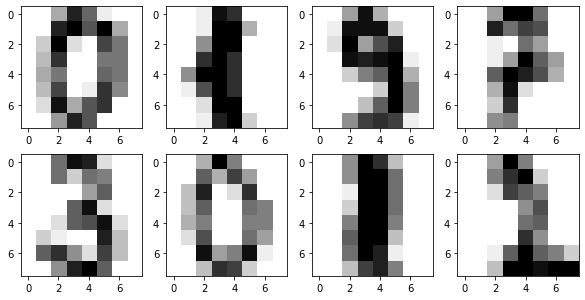

In [5]:
fig, axs = plt.subplots(2,4, figsize=(10,5))
axs[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axs[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axs[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axs[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')
axs[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axs[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axs[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axs[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

In [6]:
np.vstack([target[[0,99,199,299]],target[[999,1099,1199,1299]]])

array([[0, 1, 9, 7],
       [3, 0, 1, 2]])

## k-nearest neighbors algorithm

We will first use the k-nearest neighbors algorithm to to classify hand-written digits.

In [7]:
def knn_train_test(n_neighbors):
    
    # Use K-Folds cross-validator to split the dataset into 5 consecutive folds
    kf = KFold(shuffle=True, random_state=0)
    accuracies = []

    for train_idx, test_idx in kf.split(data):
        
        knn = KNeighborsClassifier(n_neighbors)

        knn.fit(data.loc[train_idx], target[train_idx])

        accuracies.append((knn.predict(data.loc[test_idx]) == target[test_idx]).sum()/len(test_idx) * 100)
    
    return accuracies

In [8]:
accuracies = knn_train_test(5)

print("The mean accuracy using 5 neighbors is {:.1f}%.".format(np.mean(accuracies)))

The mean accuracy using 5 neighbors is 98.2%.


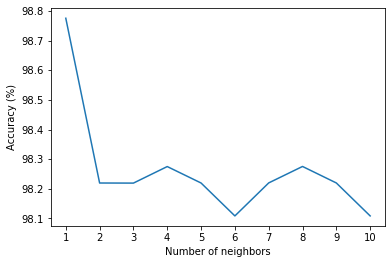

In [9]:
n_neighbors = range(1,11)

accuracies = [np.mean(knn_train_test(i)) for i in n_neighbors]

plt.plot(n_neighbors, accuracies)
plt.xticks(n_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)");

In [10]:
print("The mean accuracy using 1 neighbors is {:.1f}%.".format(accuracies[0]))

The mean accuracy using 1 neighbors is 98.8%.


The algorithm achieved an accuracy of 98.8%, which is an excellent value. However, there are a few downsides to using k-nearest neighbours:

* High memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
* No model representation to debug and explore

## Neural network model

Let's now try a neural network with a single hidden layer.

In [11]:
def nn_train_test(layer_sizes):
    
    # Use K-Folds cross-validator to split the dataset into 5 consecutive folds
    kf = KFold(shuffle=True, random_state=0)
    accuracies = []

    for train_idx, test_idx in kf.split(data):
        
        nn = MLPClassifier(layer_sizes, max_iter=10000)

        nn.fit(data.loc[train_idx], target[train_idx])

        accuracies.append((nn.predict(data.loc[test_idx]) == target[test_idx]).sum()/len(test_idx) * 100)
    
    return accuracies

In [12]:
accuracies = nn_train_test((5,))

print("The mean accuracy using one hidden layer with 5 neurons is {:.1f}%.".format(np.mean(accuracies)))

The mean accuracy using one hidden layer with 5 neurons is 88.6%.


In [13]:
neurons = range(5,201,5)

accuracies_1 = [np.mean(nn_train_test((i,))) for i in neurons]
accuracies_2 = [np.mean(nn_train_test((i,i))) for i in neurons]
accuracies_3 = [np.mean(nn_train_test((i,i,i))) for i in neurons]

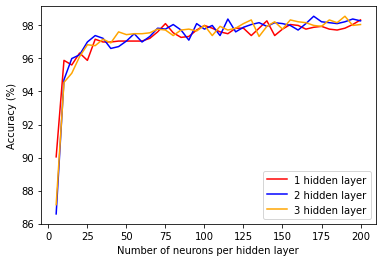

In [14]:
plt.plot(neurons, accuracies_1, color='red', label='1 hidden layer')
plt.plot(neurons, accuracies_2, color='blue', label='2 hidden layer')
plt.plot(neurons, accuracies_3, color='orange', label='3 hidden layer')
plt.xlabel("Number of neurons per hidden layer")
plt.ylabel("Accuracy (%)");
plt.legend()

In [15]:
print("The mean accuracy using one hidden layer of 50 neurons is {:.1f}%.".format(accuracies_1[9]))

The mean accuracy using one hidden layer of 50 neurons is 97.1%.


Adding up to 50 neurons to a single hidden layer significantly improves the classification accuracy. After that, the accuracy gains are not very significant. Adding more than one hidden layer did not significantly improved the accuracy of the models that use more than 50 neuros per layer.

## Conclusions

The k-nearest neighbors algorithm achieved an accuracy of 98.8%, and a neural network model with a single hidden layer with 50 neurons achieved a value of 97.4%. Although the former achieved a better accuracy for this case, in general, it is much more computationally intensive, especially when used for large datasets.